In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)

In [3]:
noise = np.random.randn(len(x_data))

In [4]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [7]:
noise.shape

(1000000,)

y = mx + b

b = 5

In [9]:
y_true = (0.5 * x_data) + 5 + noise

In [11]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [13]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [15]:
y_df

,Y
0,4.665192
1,5.668648
2,3.814736
3,6.130739
4,4.817421
...,...
999995,8.604458
999996,10.382359
999997,10.198199
999998,10.181538


In [16]:
my_data = pd.concat([x_df, y_df], axis=1)

In [17]:
my_data

,X Data,Y
0,0.00000,4.665192
1,0.00001,5.668648
2,0.00002,3.814736
3,0.00003,6.130739
4,0.00004,4.817421
...,...,...
999995,9.99996,8.604458
999996,9.99997,10.382359
999997,9.99998,10.198199
999998,9.99999,10.181538


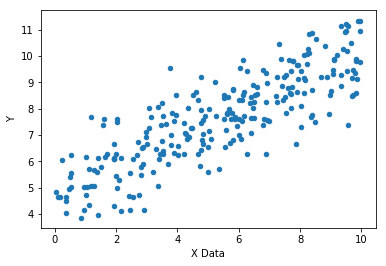

In [19]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [20]:
batch_size = 8

In [22]:
np.random.randn(2)

array([0.12972649, 0.74507071])

In [23]:
m = tf.Variable(0.12)
b = tf.Variable(1.74)

In [24]:
xph = tf.placeholder(tf.float32, [batch_size])

In [25]:
yph = tf.placeholder(tf.float32, [batch_size])

In [26]:
y_model = m*xph + b

In [27]:
error = tf.reduce_sum(tf.square(yph-y_model))

In [28]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

In [29]:
init = tf.global_variables_initializer()

In [39]:
with tf.Session() as sess:
    
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        
        feed = {xph:x_data[rand_ind], yph:y_true[rand_ind]}
        
        sess.run(train, feed_dict = feed)
        
    model_m, model_b = sess.run([m,b])

In [40]:
model_m

0.5193878

In [41]:
model_b

4.9578385

In [42]:
y_hat = x_data*model_m + model_b

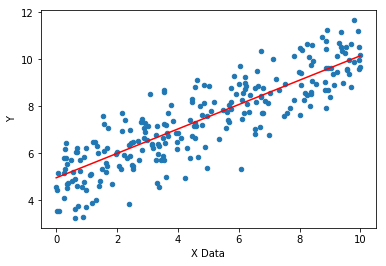

In [43]:
my_data.sample(250).plot(kind='scatter', x='X Data', y="Y")
plt.plot(x_data, y_hat, 'r')

# TF ESTIMATOR 

In [44]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [45]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Hasal\\AppData\\Local\\Temp\\tmpj06x37bk', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002175EA5E788>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_true, test_size=0.3, random_state=101)

In [48]:
print(x_train.shape)

(700000,)


In [49]:
print(x_test.shape)

(300000,)


In [50]:
input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [51]:
train_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [52]:
test_input_func = tf.estimator.inputs.numpy_input_fn({'x':x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [53]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use `tf.cast` instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into C:\Users\Hasal\AppData\Local\Temp\tmpj06x37bk\model.ckpt.
INFO:tensorflow:loss = 418.94284, step = 1
INFO:tensorflow:global_step/sec: 520.693
INFO:tensorflow:loss = 21.11586

In [54]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T18:53:24Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpj06x37bk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-16-18:53:25
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0763913, global_step = 1000, label/mean = 7.48819

In [55]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-05-16T18:54:31Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpj06x37bk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2020-05-16-18:54:32
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0666741, global_step = 1000, label/mean = 7.486998, loss = 8.533393, prediction/mean = 7.3121963
INFO:tensorflow:Saving 'checkpoint_path

In [57]:
print('TRAINING DATA METRICS')
print(train_metrics)

TRAINING DATA METRICS
{'average_loss': 1.0763913, 'label/mean': 7.488196, 'loss': 8.611131, 'prediction/mean': 7.333173, 'global_step': 1000}


In [58]:
print('TESTING DATA METRICS')
print(test_metrics)

TESTING DATA METRICS
{'average_loss': 1.0666741, 'label/mean': 7.486998, 'loss': 8.533393, 'prediction/mean': 7.3121963, 'global_step': 1000}


In [59]:
brand_new_data = np.linspace(0,10,10)

In [60]:
input_fn_predict = tf.estimator.inputs.numpy_input_fn({'x':brand_new_data}, shuffle=False)

In [62]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpj06x37bk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.4286885], dtype=float32)},
 {'predictions': array([5.0738397], dtype=float32)},
 {'predictions': array([5.7189903], dtype=float32)},
 {'predictions': array([6.3641415], dtype=float32)},
 {'predictions': array([7.0092926], dtype=float32)},
 {'predictions': array([7.654443], dtype=float32)},
 {'predictions': array([8.299594], dtype=float32)},
 {'predictions': array([8.944745], dtype=float32)},
 {'predictions': array([9.589896], dtype=float32)},
 {'predictions': array([10.235046], dtype=float32)}]

In [64]:
predictions = []

for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Hasal\AppData\Local\Temp\tmpj06x37bk\model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [65]:
predictions

[array([4.4286885], dtype=float32),
 array([5.0738397], dtype=float32),
 array([5.7189903], dtype=float32),
 array([6.3641415], dtype=float32),
 array([7.0092926], dtype=float32),
 array([7.654443], dtype=float32),
 array([8.299594], dtype=float32),
 array([8.944745], dtype=float32),
 array([9.589896], dtype=float32),
 array([10.235046], dtype=float32)]

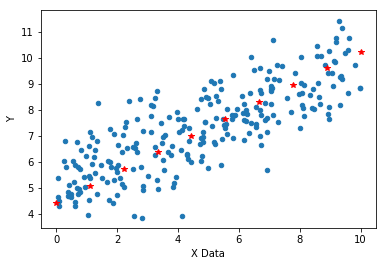

In [67]:
my_data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(brand_new_data,predictions, 'r*')